In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

09/30/2020 17:36:44 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
09/30/2020 17:36:46 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
09/30/2020 17:36:47 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
09/30/2020 17:36:47 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
09/30/2020 17:36:48 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

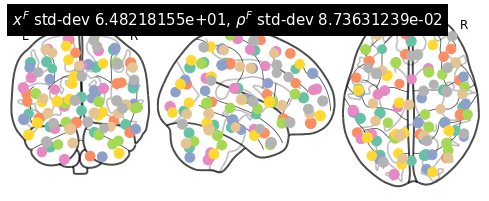

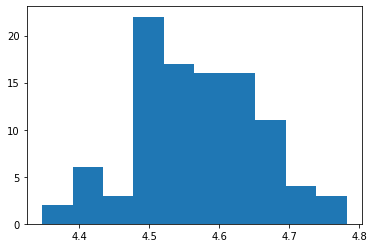

(<nilearn.plotting.displays.OrthoProjector at 0x7fbaae707b10>,
 tensor([[-3.1599e+01, -2.9942e+01, -2.2246e+01],
         [ 3.5161e+01, -5.7206e+00,  5.8736e+01],
         [ 4.7809e+01, -4.8420e+01, -1.9889e+01],
         [-3.5286e+01, -5.9165e+01,  4.5892e+01],
         [-2.9329e+01,  3.7177e+01,  3.8877e+01],
         [ 1.1335e+00,  4.5766e+01,  8.7759e+00],
         [ 1.4338e+00, -8.0111e+01, -5.2915e+00],
         [ 1.6795e+01, -7.3740e+01,  4.0478e+01],
         [-5.2226e+01, -3.5461e+01,  4.5220e+01],
         [ 5.5854e+01, -2.3626e+01,  1.8739e+01],
         [-5.4135e+01, -4.1900e+00, -8.5401e+00],
         [ 1.4992e+01, -7.4646e+01, -2.8195e+01],
         [-3.1671e+01, -7.4407e+01, -4.3466e+01],
         [ 3.5309e+01,  2.9392e+01, -1.5872e+01],
         [-1.1116e+01,  8.9612e-01,  6.9390e+01],
         [-4.8863e+00,  3.1932e+01,  5.5456e+01],
         [ 3.8435e+01, -7.7022e+01,  2.3010e+01],
         [ 4.3357e+01,  3.7475e+01,  2.4148e+01],
         [ 1.0437e+01, -5.2271e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

512

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

09/30/2020 17:38:09 [Epoch 1] (8904ms) Posterior free-energy 8.97321267e+09 = KL from prior 1.64697410e+07 - log-likelihood -8.95674266e+09
09/30/2020 17:38:09 Saving checkpoint...
09/30/2020 17:38:16 [Epoch 2] (6685ms) Posterior free-energy 8.72889856e+09 = KL from prior 9.71753200e+06 - log-likelihood -8.71918387e+09
09/30/2020 17:38:22 [Epoch 3] (6637ms) Posterior free-energy 8.56732365e+09 = KL from prior 6.58197750e+06 - log-likelihood -8.56074240e+09
09/30/2020 17:38:29 [Epoch 4] (6645ms) Posterior free-energy 8.45535283e+09 = KL from prior 4.87268850e+06 - log-likelihood -8.45048013e+09
09/30/2020 17:38:35 [Epoch 5] (6627ms) Posterior free-energy 8.37389926e+09 = KL from prior 3.38205600e+06 - log-likelihood -8.37051750e+09
09/30/2020 17:38:42 [Epoch 6] (6684ms) Posterior free-energy 8.31471974e+09 = KL from prior 2.25529950e+06 - log-likelihood -8.31246438e+09
09/30/2020 17:38:49 [Epoch 7] (6671ms) Posterior free-energy 8.26661632e+09 = KL from prior 1.58883575e+06 - log-likeli

Epoch   365: reducing learning rate of group 0 to 5.0000e-03.
Epoch   365: reducing learning rate of group 1 to 5.0000e-04.
Epoch   365: reducing learning rate of group 2 to 5.0000e-03.
Epoch   365: reducing learning rate of group 3 to 5.0000e-04.


09/30/2020 18:18:28 [Epoch 366] (6589ms) Posterior free-energy 5.77894707e+09 = KL from prior 1.84607800e+06 - log-likelihood -5.77710131e+09
09/30/2020 18:18:34 [Epoch 367] (6567ms) Posterior free-energy 5.74347366e+09 = KL from prior 1.84290750e+06 - log-likelihood -5.74163046e+09
09/30/2020 18:18:41 [Epoch 368] (6588ms) Posterior free-energy 5.74177690e+09 = KL from prior 1.84480238e+06 - log-likelihood -5.73993267e+09
09/30/2020 18:18:47 [Epoch 369] (6570ms) Posterior free-energy 5.74094182e+09 = KL from prior 1.84413838e+06 - log-likelihood -5.73909658e+09
09/30/2020 18:18:54 [Epoch 370] (6588ms) Posterior free-energy 5.74025830e+09 = KL from prior 1.84523988e+06 - log-likelihood -5.73841306e+09
09/30/2020 18:19:01 [Epoch 371] (6588ms) Posterior free-energy 5.73975910e+09 = KL from prior 1.84476500e+06 - log-likelihood -5.73791642e+09
09/30/2020 18:19:07 [Epoch 372] (6557ms) Posterior free-energy 5.73926093e+09 = KL from prior 1.84604300e+06 - log-likelihood -5.73741517e+09
09/30/

Epoch   563: reducing learning rate of group 0 to 2.5000e-03.
Epoch   563: reducing learning rate of group 1 to 2.5000e-04.
Epoch   563: reducing learning rate of group 2 to 2.5000e-03.
Epoch   563: reducing learning rate of group 3 to 2.5000e-04.


09/30/2020 18:40:18 [Epoch 564] (6610ms) Posterior free-energy 5.71548006e+09 = KL from prior 1.91230038e+06 - log-likelihood -5.71356928e+09
09/30/2020 18:40:25 [Epoch 565] (6628ms) Posterior free-energy 5.71242496e+09 = KL from prior 1.91066025e+06 - log-likelihood -5.71051366e+09
09/30/2020 18:40:31 [Epoch 566] (6609ms) Posterior free-energy 5.71189504e+09 = KL from prior 1.91153438e+06 - log-likelihood -5.70998477e+09
09/30/2020 18:40:38 [Epoch 567] (6614ms) Posterior free-energy 5.71167334e+09 = KL from prior 1.91033262e+06 - log-likelihood -5.70976358e+09
09/30/2020 18:40:45 [Epoch 568] (6595ms) Posterior free-energy 5.71172147e+09 = KL from prior 1.91054250e+06 - log-likelihood -5.70981274e+09
09/30/2020 18:40:51 [Epoch 569] (6612ms) Posterior free-energy 5.71157350e+09 = KL from prior 1.91253488e+06 - log-likelihood -5.70965965e+09
09/30/2020 18:40:58 [Epoch 570] (6637ms) Posterior free-energy 5.71145062e+09 = KL from prior 1.91309950e+06 - log-likelihood -5.70953779e+09
09/30/

Epoch   876: reducing learning rate of group 0 to 1.2500e-03.
Epoch   876: reducing learning rate of group 1 to 1.2500e-04.
Epoch   876: reducing learning rate of group 2 to 1.2500e-03.
Epoch   876: reducing learning rate of group 3 to 1.2500e-04.


09/30/2020 19:14:56 [Epoch 877] (6617ms) Posterior free-energy 5.70008678e+09 = KL from prior 1.93858725e+06 - log-likelihood -5.69814835e+09
09/30/2020 19:15:03 [Epoch 878] (6648ms) Posterior free-energy 5.69992755e+09 = KL from prior 1.93950838e+06 - log-likelihood -5.69798810e+09
09/30/2020 19:15:09 [Epoch 879] (6621ms) Posterior free-energy 5.69976883e+09 = KL from prior 1.93741725e+06 - log-likelihood -5.69782989e+09
09/30/2020 19:15:16 [Epoch 880] (6641ms) Posterior free-energy 5.69964544e+09 = KL from prior 1.94145525e+06 - log-likelihood -5.69770394e+09
09/30/2020 19:15:23 [Epoch 881] (6631ms) Posterior free-energy 5.69966387e+09 = KL from prior 1.93925988e+06 - log-likelihood -5.69772544e+09
09/30/2020 19:15:29 [Epoch 882] (6638ms) Posterior free-energy 5.69957325e+09 = KL from prior 1.93533050e+06 - log-likelihood -5.69763789e+09
09/30/2020 19:15:36 [Epoch 883] (6609ms) Posterior free-energy 5.69966694e+09 = KL from prior 1.93781200e+06 - log-likelihood -5.69772902e+09
09/30/

Epoch   905: reducing learning rate of group 0 to 6.2500e-04.
Epoch   905: reducing learning rate of group 1 to 6.2500e-05.
Epoch   905: reducing learning rate of group 2 to 6.2500e-04.
Epoch   905: reducing learning rate of group 3 to 6.2500e-05.


09/30/2020 19:18:09 [Epoch 906] (6608ms) Posterior free-energy 5.69909146e+09 = KL from prior 1.94112862e+06 - log-likelihood -5.69715200e+09
09/30/2020 19:18:15 [Epoch 907] (6646ms) Posterior free-energy 5.69896243e+09 = KL from prior 1.93605350e+06 - log-likelihood -5.69702707e+09
09/30/2020 19:18:22 [Epoch 908] (6621ms) Posterior free-energy 5.69899264e+09 = KL from prior 1.93761362e+06 - log-likelihood -5.69705677e+09
09/30/2020 19:18:28 [Epoch 909] (6621ms) Posterior free-energy 5.69902694e+09 = KL from prior 1.93860088e+06 - log-likelihood -5.69708851e+09
09/30/2020 19:18:35 [Epoch 910] (6609ms) Posterior free-energy 5.69895629e+09 = KL from prior 1.93655225e+06 - log-likelihood -5.69701990e+09
09/30/2020 19:18:42 [Epoch 911] (6612ms) Posterior free-energy 5.69898189e+09 = KL from prior 1.93426538e+06 - log-likelihood -5.69704858e+09
09/30/2020 19:18:48 [Epoch 912] (6613ms) Posterior free-energy 5.69886822e+09 = KL from prior 1.94008275e+06 - log-likelihood -5.69692877e+09
09/30/

Epoch   933: reducing learning rate of group 0 to 3.1250e-04.
Epoch   933: reducing learning rate of group 1 to 3.1250e-05.
Epoch   933: reducing learning rate of group 2 to 3.1250e-04.
Epoch   933: reducing learning rate of group 3 to 3.1250e-05.


09/30/2020 19:21:15 [Epoch 934] (6628ms) Posterior free-energy 5.69852928e+09 = KL from prior 1.93941538e+06 - log-likelihood -5.69658982e+09
09/30/2020 19:21:22 [Epoch 935] (6593ms) Posterior free-energy 5.69857331e+09 = KL from prior 1.93889638e+06 - log-likelihood -5.69663488e+09
09/30/2020 19:21:29 [Epoch 936] (6616ms) Posterior free-energy 5.69855642e+09 = KL from prior 1.93773988e+06 - log-likelihood -5.69661798e+09
09/30/2020 19:21:35 [Epoch 937] (6654ms) Posterior free-energy 5.69846886e+09 = KL from prior 1.93601375e+06 - log-likelihood -5.69653248e+09
09/30/2020 19:21:42 [Epoch 938] (6633ms) Posterior free-energy 5.69854362e+09 = KL from prior 1.93601700e+06 - log-likelihood -5.69660723e+09
09/30/2020 19:21:49 [Epoch 939] (6650ms) Posterior free-energy 5.69846426e+09 = KL from prior 1.94206138e+06 - log-likelihood -5.69652224e+09
09/30/2020 19:21:55 [Epoch 940] (6643ms) Posterior free-energy 5.69848627e+09 = KL from prior 1.93855562e+06 - log-likelihood -5.69654733e+09
09/30/

Epoch   954: reducing learning rate of group 0 to 1.5625e-04.
Epoch   954: reducing learning rate of group 1 to 1.5625e-05.
Epoch   954: reducing learning rate of group 2 to 1.5625e-04.
Epoch   954: reducing learning rate of group 3 to 1.5625e-05.


09/30/2020 19:23:35 [Epoch 955] (6627ms) Posterior free-energy 5.69849190e+09 = KL from prior 1.93663062e+06 - log-likelihood -5.69655501e+09
09/30/2020 19:23:42 [Epoch 956] (6638ms) Posterior free-energy 5.69839718e+09 = KL from prior 1.93966038e+06 - log-likelihood -5.69645568e+09
09/30/2020 19:23:48 [Epoch 957] (6631ms) Posterior free-energy 5.69848832e+09 = KL from prior 1.93889062e+06 - log-likelihood -5.69654989e+09
09/30/2020 19:23:55 [Epoch 958] (6650ms) Posterior free-energy 5.69841562e+09 = KL from prior 1.93652862e+06 - log-likelihood -5.69647872e+09
09/30/2020 19:24:02 [Epoch 959] (6641ms) Posterior free-energy 5.69839718e+09 = KL from prior 1.93762188e+06 - log-likelihood -5.69645978e+09
09/30/2020 19:24:08 [Epoch 960] (6623ms) Posterior free-energy 5.69845862e+09 = KL from prior 1.93705162e+06 - log-likelihood -5.69652224e+09
09/30/2020 19:24:15 [Epoch 961] (6649ms) Posterior free-energy 5.69843763e+09 = KL from prior 1.93594950e+06 - log-likelihood -5.69650330e+09
09/30/

Epoch   989: reducing learning rate of group 0 to 7.8125e-05.
Epoch   989: reducing learning rate of group 1 to 1.0000e-05.
Epoch   989: reducing learning rate of group 2 to 7.8125e-05.
Epoch   989: reducing learning rate of group 3 to 1.0000e-05.


09/30/2020 19:27:28 [Epoch 990] (6642ms) Posterior free-energy 5.69828864e+09 = KL from prior 1.93588375e+06 - log-likelihood -5.69635430e+09
09/30/2020 19:27:35 [Epoch 991] (6648ms) Posterior free-energy 5.69834035e+09 = KL from prior 1.93846825e+06 - log-likelihood -5.69640294e+09
09/30/2020 19:27:41 [Epoch 992] (6623ms) Posterior free-energy 5.69821850e+09 = KL from prior 1.94189288e+06 - log-likelihood -5.69627648e+09
09/30/2020 19:27:48 [Epoch 993] (6615ms) Posterior free-energy 5.69839770e+09 = KL from prior 1.93763600e+06 - log-likelihood -5.69645824e+09
09/30/2020 19:27:54 [Epoch 994] (6630ms) Posterior free-energy 5.69828198e+09 = KL from prior 1.93860700e+06 - log-likelihood -5.69634406e+09
09/30/2020 19:28:01 [Epoch 995] (6645ms) Posterior free-energy 5.69818061e+09 = KL from prior 1.94303350e+06 - log-likelihood -5.69623706e+09
09/30/2020 19:28:08 [Epoch 996] (6643ms) Posterior free-energy 5.69818522e+09 = KL from prior 1.93841675e+06 - log-likelihood -5.69624730e+09
09/30/

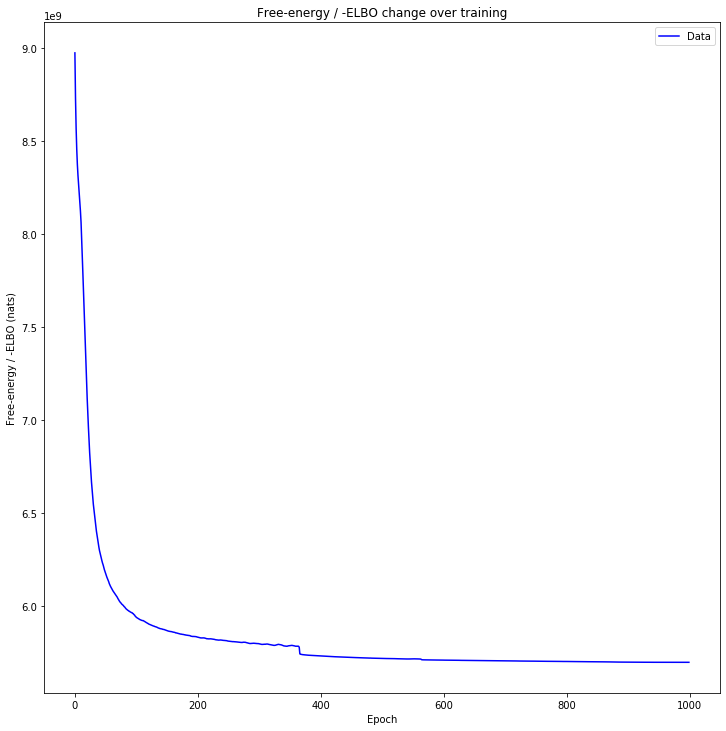

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

09/30/2020 19:28:36 [Epoch 1] (774ms) Posterior free-energy 1.38858342e+09 = KL from prior 1.08070305e+05 - log-likelihood -1.38847526e+09
09/30/2020 19:28:36 Saving checkpoint...
09/30/2020 19:28:37 [Epoch 2] (777ms) Posterior free-energy 1.34894093e+09 = KL from prior 1.01922836e+05 - log-likelihood -1.34883904e+09
09/30/2020 19:28:37 [Epoch 3] (775ms) Posterior free-energy 1.32465498e+09 = KL from prior 9.98519531e+04 - log-likelihood -1.32455514e+09
09/30/2020 19:28:38 [Epoch 4] (773ms) Posterior free-energy 1.28728026e+09 = KL from prior 9.80067891e+04 - log-likelihood -1.28718234e+09
09/30/2020 19:28:39 [Epoch 5] (775ms) Posterior free-energy 1.25813862e+09 = KL from prior 9.68708203e+04 - log-likelihood -1.25804186e+09
09/30/2020 19:28:40 [Epoch 6] (765ms) Posterior free-energy 1.23764518e+09 = KL from prior 9.57762656e+04 - log-likelihood -1.23754957e+09
09/30/2020 19:28:40 [Epoch 7] (775ms) Posterior free-energy 1.21579187e+09 = KL from prior 9.48394453e+04 - log-likelihood -1

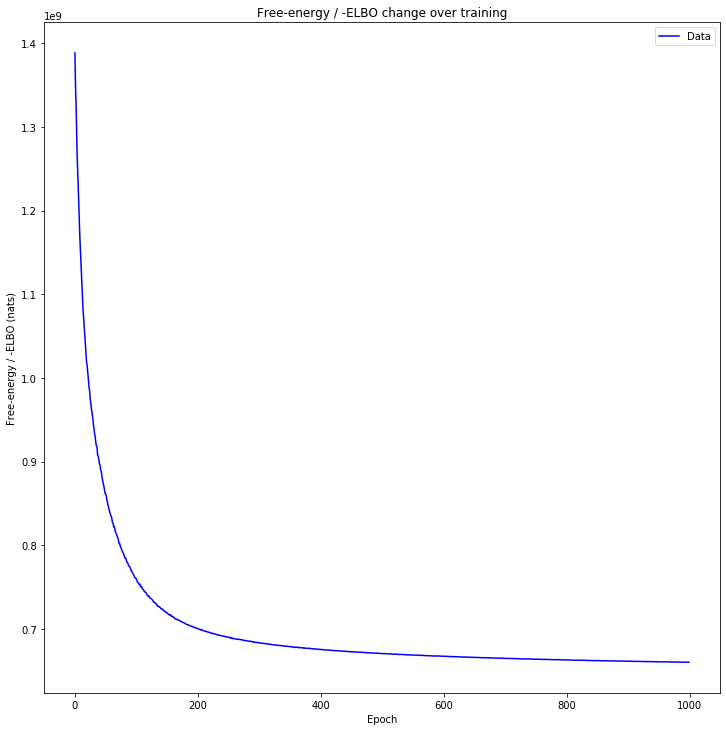

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

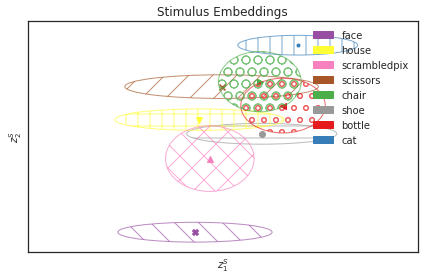

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

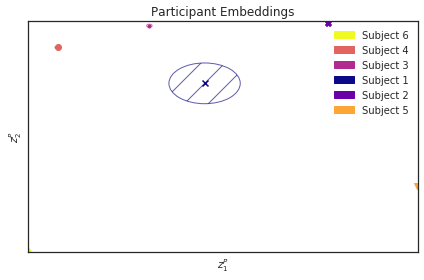

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

09/30/2020 19:41:30 Plotting factors for Participant 6, run 5


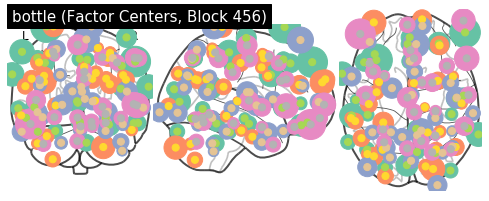

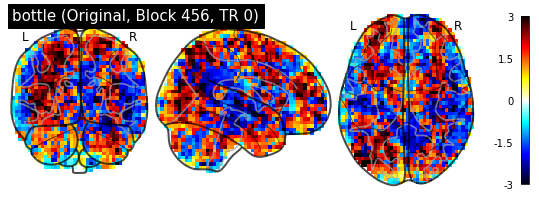

09/30/2020 19:41:32 Reconstruction Error (Frobenius Norm): 1.32639511e+02 out of 6.38817688e+02


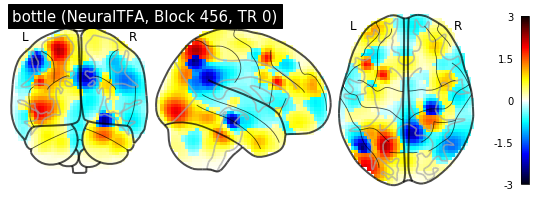

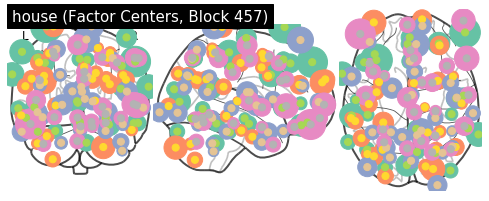

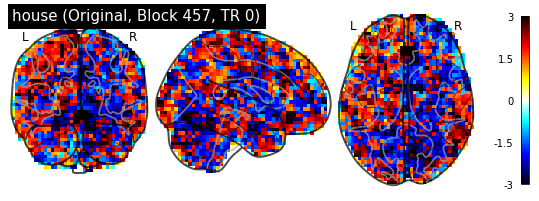

09/30/2020 19:41:35 Reconstruction Error (Frobenius Norm): 1.29611359e+02 out of 5.82021790e+02


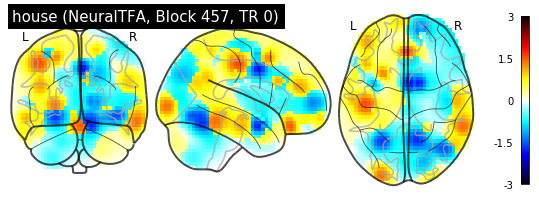

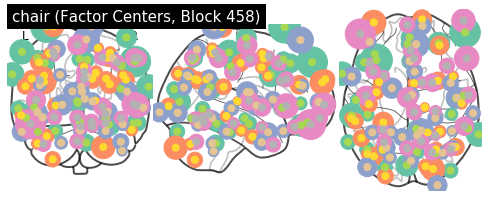

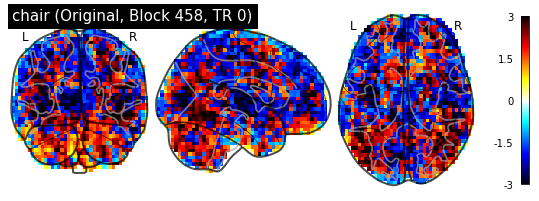

09/30/2020 19:41:38 Reconstruction Error (Frobenius Norm): 1.18451469e+02 out of 5.83587036e+02


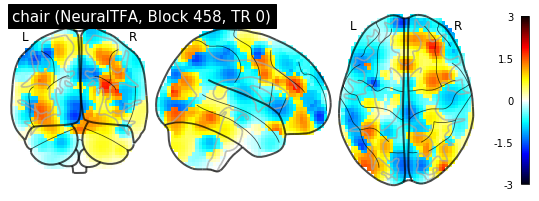

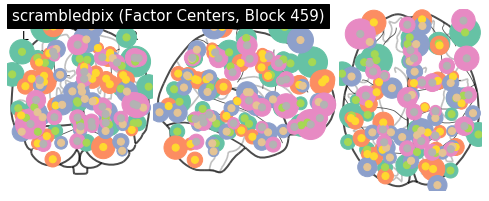

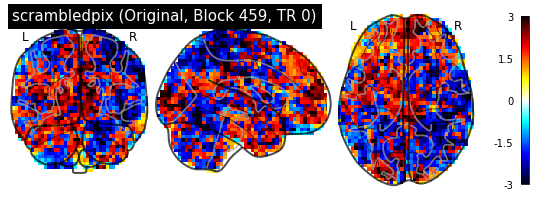

09/30/2020 19:41:41 Reconstruction Error (Frobenius Norm): 1.08229111e+02 out of 5.44029053e+02


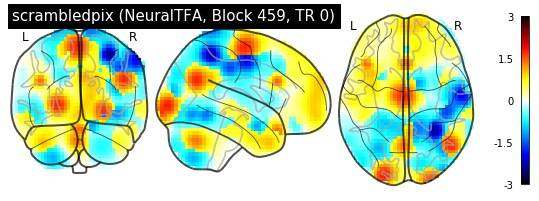

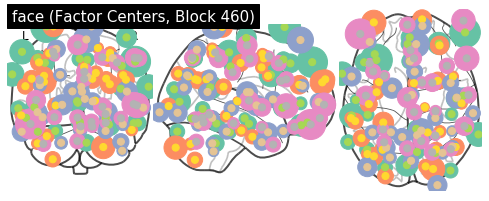

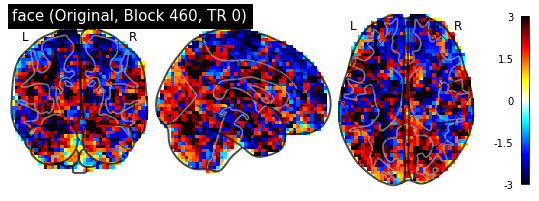

09/30/2020 19:41:44 Reconstruction Error (Frobenius Norm): 1.13537697e+02 out of 5.62231445e+02


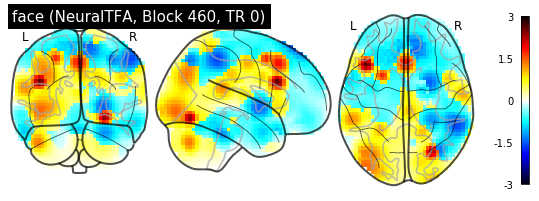

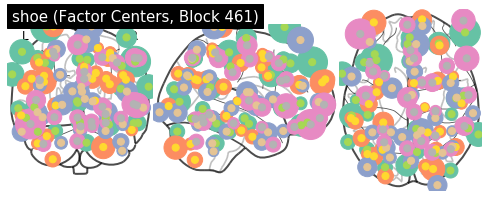

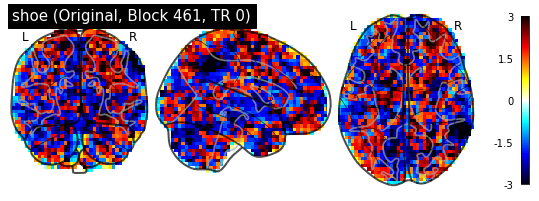

09/30/2020 19:41:46 Reconstruction Error (Frobenius Norm): 1.31996628e+02 out of 6.15114502e+02


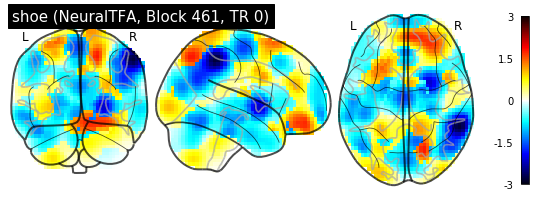

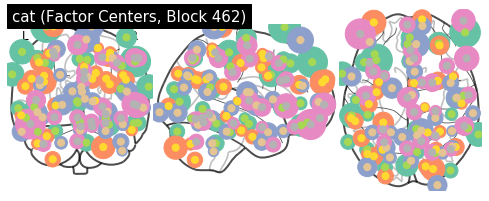

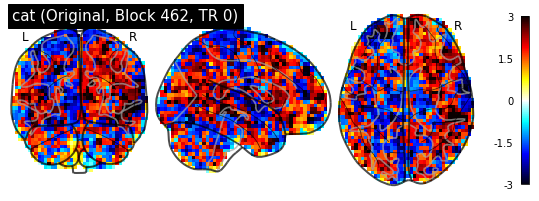

09/30/2020 19:41:49 Reconstruction Error (Frobenius Norm): 1.17826225e+02 out of 5.86721069e+02


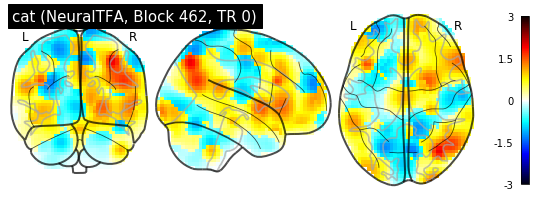

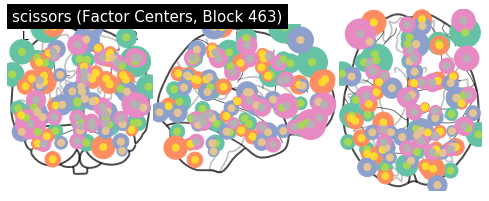

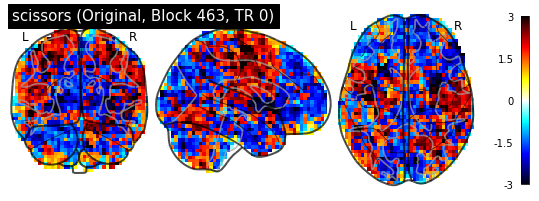

09/30/2020 19:41:52 Reconstruction Error (Frobenius Norm): 1.16231308e+02 out of 5.80015869e+02


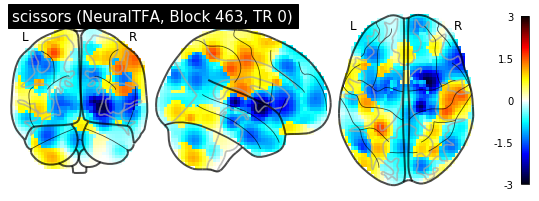

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

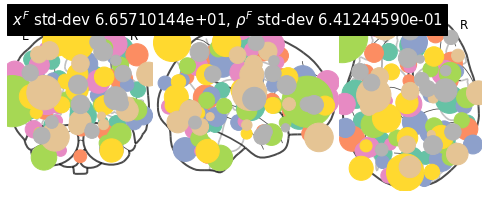

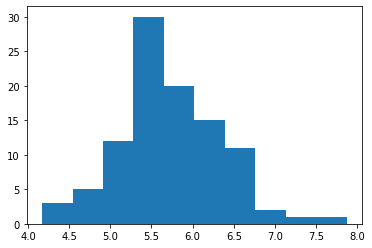

(<nilearn.plotting.displays.OrthoProjector at 0x7fba4f5c8090>,
 tensor([[-3.1316e+01, -4.7274e+01, -2.0673e+01],
         [ 4.1608e+01, -1.5533e+01,  5.7803e+01],
         [ 3.8771e+01, -5.7901e+01, -1.9149e+01],
         [-2.9939e+01, -5.8474e+01,  4.6623e+01],
         [-2.2372e+01,  3.4310e+01,  2.7600e+01],
         [ 3.1204e+00,  4.1293e+01, -1.0526e+01],
         [ 1.4646e+00, -7.7650e+01, -4.5171e+00],
         [ 1.6455e+01, -7.6961e+01,  3.4171e+01],
         [-5.0527e+01, -3.7800e+01,  4.8492e+01],
         [ 6.0547e+01, -4.0215e+01,  1.6741e+01],
         [-5.6658e+01, -1.0038e+01, -3.4846e-01],
         [ 2.4210e+01, -7.3883e+01, -1.6736e+01],
         [-2.8424e+01, -7.2634e+01, -4.2971e+01],
         [ 2.6895e+01,  5.2505e+01, -2.8838e+01],
         [-9.5275e-01,  3.9902e+00,  5.3947e+01],
         [-1.5928e+00,  2.1362e+01,  5.3132e+01],
         [ 3.2005e+01, -7.7069e+01,  3.0809e+01],
         [ 4.3438e+01,  2.2442e+01,  2.7722e+01],
         [ 1.1579e-01, -5.5681e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

09/30/2020 19:42:03 Average reconstruction error (MSE): 5.22302660e+02 +/- 4.21469224e+01
09/30/2020 19:42:03 Average data norm (Euclidean): 6.03296236e+02 +/- 6.20599490e+01
09/30/2020 19:42:03 Percent average reconstruction error: 86.840994 +/- 3.98213570e+00


(array([557.18756104, 533.49884033, 497.96353149, 507.11367798,
        523.4954834 , 507.58459473, 511.46868896, 485.85354614,
        556.86639404, 526.51641846, 499.0430603 , 449.10467529,
        468.89620972, 488.5993042 , 546.04699707, 540.47967529,
        499.65240479, 495.78991699, 467.82650757, 500.10583496,
        478.1824646 , 532.71008301, 501.04742432, 509.43515015,
        614.52954102, 546.15478516, 507.1585083 , 531.54846191,
        477.07626343, 511.95108032, 514.43414307, 476.08648682,
        584.32470703, 523.78186035, 466.27709961, 492.72061157,
        530.38494873, 490.88082886, 505.24514771, 539.37670898,
        592.54754639, 499.40563965, 495.81124878, 518.65881348,
        524.58569336, 507.88690186, 543.42858887, 489.88754272,
        522.64855957, 534.72454834, 483.86343384, 455.868927  ,
        506.62466431, 552.27880859, 517.95336914, 548.81988525,
        454.06216431, 448.7651062 , 467.06430054, 448.33947754,
        464.98492432, 465.09915161, 430.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[660072704.0, -659906880.0, 165675.734375],
 [660192576.0, -659758144.0, 166062.953125]]